In [1]:
"""
Briar Doty
AMATH 584 - HW3
11/1/20
Full repository available at https://github.com/briardoty/amath584/hw3
"""

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from gram_schmidt import * 
import matlab.engine

slightly over-determined


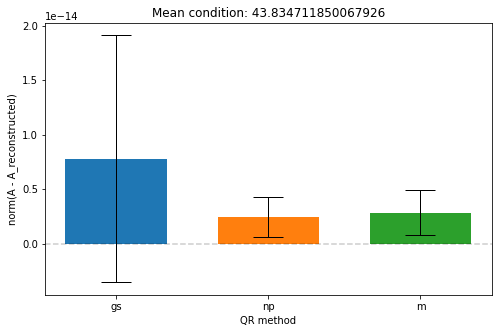

larger, but still slightly over-determined


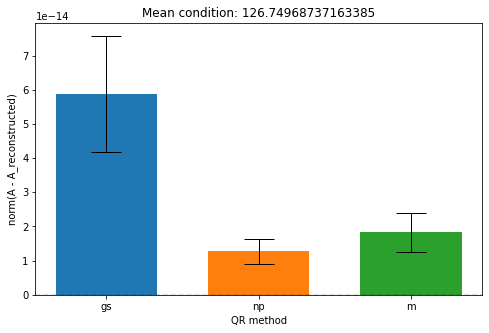

significantly over-determined


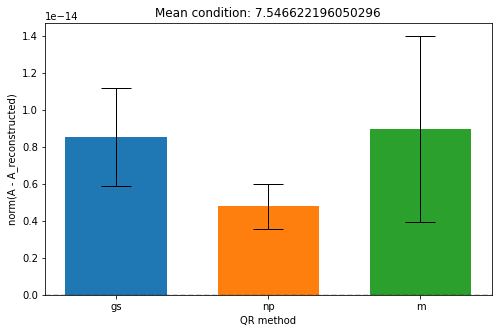

ill-conditioned


/home/briardoty/anaconda3/envs/amath2/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


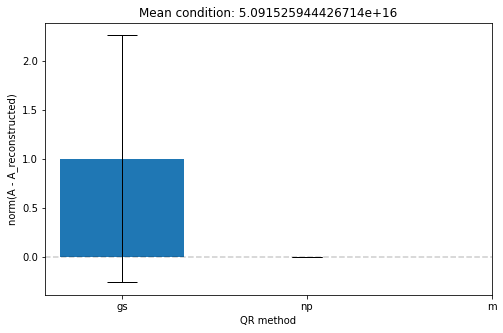

In [3]:
# 1 - QR decomposition
"""
Comparing QR decomposition using my Gram-Schmidt implementation,
numpy's linalg.qr, and our qrfactor. Comparison metric is the matrix
norm of the difference between A and the reconstruction of A using
A = QR. The mean condition number in each experiment is in each
figure's title. My modified Gram-Schmidt implementation is clearly
not resistant to the ill-condition in the last experiment.

Error bars are a 95% confidence interval based on 10 samples.
"""
eng = matlab.engine.start_matlab()
samples = 10

print("slightly over-determined")
m, n = 12, 10
compare_qr(eng, samples, m, n)

print("larger, but still slightly over-determined")
m, n = 60, 50
compare_qr(eng, samples, m, n)

print("significantly over-determined")
m, n = 100, 10
compare_qr(eng, samples, m, n)

print("ill-conditioned")
m, n = 12, 10
compare_qr(eng, samples, m, n, ill=True)

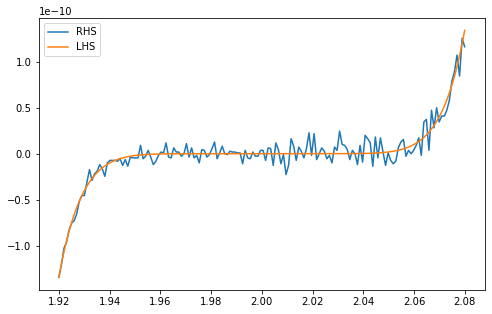

In [12]:
# 2 - Numerical error
"""
The same polynomial with two different numerical interpretations...

Clearly the RHS expression introduces more numerical error.
"""

# input
dx = 0.001
left, right = 1.920, 2.080
n = int((right - left) / dx)
x = np.linspace(1.920, 2.080, n)

# evaluate
y1 = x**9 - 18*x**8 + 144*x**7 - 672*x**6 + 2016*x**5 - 4032*x**4 + \
    5376*x**3 - 4608*x**2 + 2304*x - 512
y2 = (x - 2)**9

# plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, y1, label="RHS")
ax.plot(x, y2, label="LHS")
ax.legend()

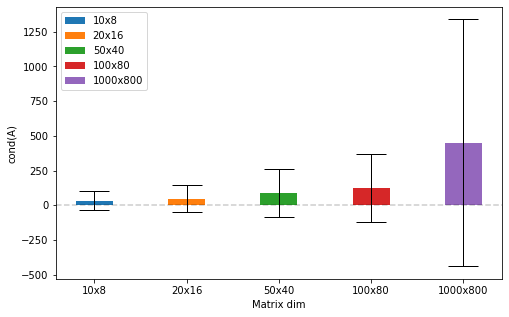

In [18]:
# 3a - Matrix conditioning
"""
Matrix condition as a function of size 
"""

samples = 10
m_arr = [10, 20, 50, 100, 1000]
n_arr = [8, 16, 40, 80, 800]

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
err_kw = dict(lw=1, capsize=15, capthick=1)
x, width = 0, 1/len(n_arr)
labels, ticks = [], []

# loop over matrix sizes
for m, n in zip(m_arr, n_arr):
    
    c_arr = []
    for s in range(samples):
        A = np.random.rand(m,n)
        c = np.linalg.cond(A)
        c_arr.append(c)
    
    # condition stats
    c_mean = np.mean(c_arr)
    c_std  = np.mean(c_arr)
    
    # plot
    l = f"{m}x{n}"
    labels.append(l)
    ticks.append(x)
    ax.bar(x, c_mean, width, yerr=c_std*1.98, label=l, 
        error_kw=err_kw)
    x += 0.5
    
# plot info
ax.set_xlabel("Matrix dim")
ax.set_ylabel("cond(A)")
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.legend()
    


In [28]:
# 3b - Matrix conditioning
"""
Matrix condition/det with 2 linearly dependent columns.

The condition number blows up while the determinant becomes very small.
"""

m, n = 10, 9
A = np.random.rand(m,n)
A_full = np.append(A, A[:,0][...,None], 1)

print(f"Cond(A) = {np.linalg.cond(A_full)}")
print(f"Det(A) = {np.linalg.det(A_full)}")

Cond(A) = 7.39199440484995e+16
Det(A) = 4.802734832298839e-19


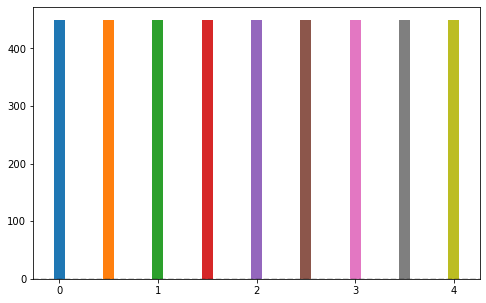

In [60]:
# 3c - Matrix conditioning
"""
Matrix condition as a function of noise in dependent columns.
"""

# define noise factor
eps_arr = [10**-x for x in range(1, 10)]
eps_arr.reverse()

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
x, width = 0, 1/len(eps_arr)
labels, ticks = [], []

# init matrix
m, n = 10, 9
A = np.random.rand(m,n)
A_full = np.append(A, np.zeros((m,1)), 1)

# try different noise vals
for eps in eps_arr:
    a_col = A_full[:,0] + eps*np.random.rand(m)
    A_full[:,-1] = a_col
    c = np.linalg.cond(A_full)
    
    # plot
    l = f"{eps}"
    labels.append(l)
    ticks.append(x)
    ax.bar(x, c_mean, width, label=l)
    x += 0.5